In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [188]:
plt.rcParams.update({'axes.labelsize':30,
                     'xtick.labelsize':20,
                     'ytick.labelsize':20,
                     'axes.titlesize': 30
                    })

In [98]:
all_df = pd.read_csv("../../../analysis/all_test_performance.csv")
all_df['log_true'] = np.log10(all_df['true_labels'])
all_df['log_pred'] = np.log10(all_df['predictions'])
one_part_df = all_df[all_df['parts']==1]
two_part_df = all_df[all_df['parts']==2]
all_df_filtered = all_df[all_df['values']=='D/K']
outlier_counts = dict(all_df_filtered[all_df_filtered['log_pred']<=0]['data'].value_counts())
all_df_filtered = all_df[all_df['log_pred']>0]
outliers_removed = len(all_df) - len(all_df_filtered)
min_val = np.min([all_df_filtered['log_true'].min(), all_df_filtered['log_pred'].min()])
max_val = np.max([all_df_filtered['log_true'].max(), all_df_filtered['log_pred'].max()])

/tmp/ipykernel_96057/2608353238.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv("../../../analysis/all_test_performance.csv")
/home/jo/micromamba/envs/torchland/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [99]:
def add_histogram(x,y, **kwargs):
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.hist(x, bins=30, alpha=0.1, label=r"True $\log_{10}(D/K)$ Distribution#, bins=bins, color=COLORS['histogram'], alpha=0.6)


SyntaxError: unterminated string literal (detected at line 4) (305518012.py, line 4)

In [100]:
label_map = {'dem': 'Elevation',
         'slope': 'Slope',
         'curvature': 'Curvature',
         'accumulation': 'Flow Accumulation',
         'logaccumulation': '$\\log_{10}(\\text{Flow Accumulation})$',
         'dem_dem': 'Elevation, Elevation',
         'dem_slope': 'Elevation, Slope',
         'dem_curvature': 'Elevation, Curvature',
         'dem_accumulation': 'Elevation, Flow Accumulation'}

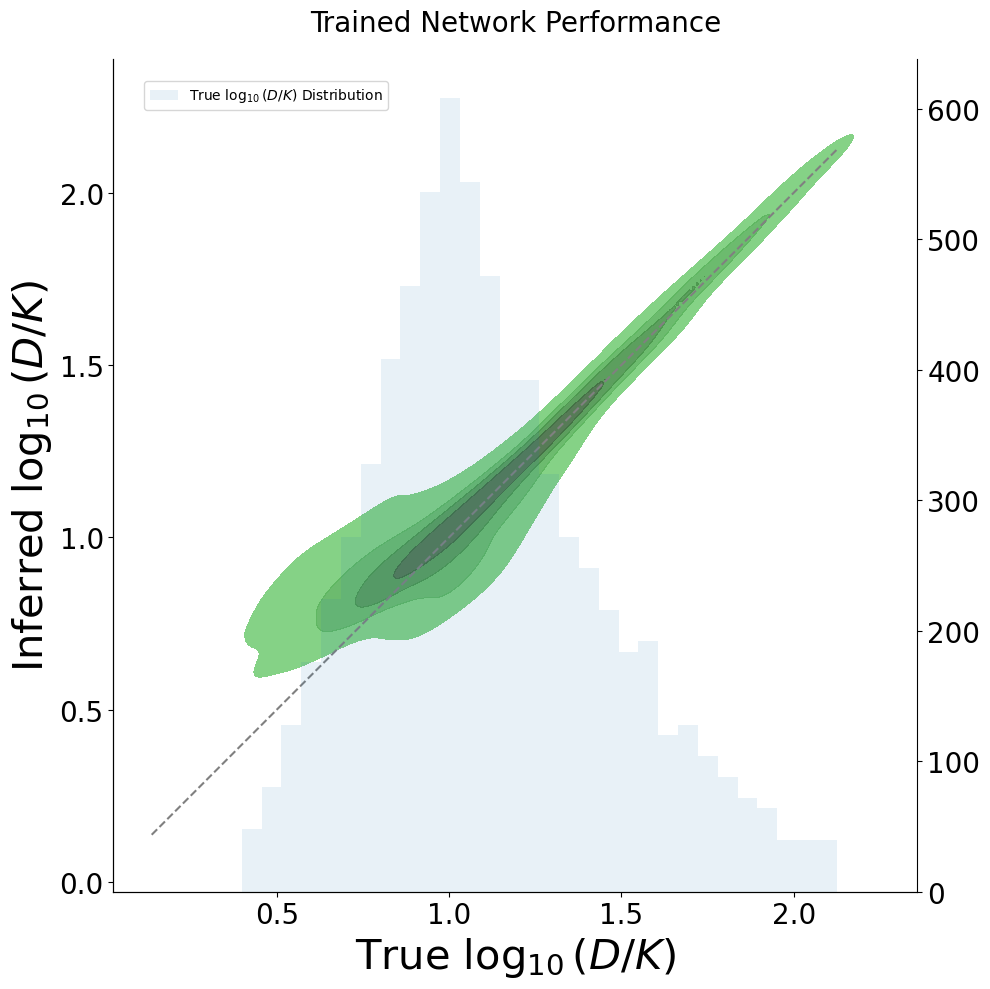

In [204]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(all_df_filtered[all_df_filtered['data']=='dem'],
            x='log_true', y='log_pred', levels=5, color='#2C5F2D',fill=True, alpha=0.9, ax=ax)#, alpha=0.5)
ax = plt.gca()
ax2 = ax.twinx()
ax2.hist(all_df_filtered[all_df_filtered['data']=='dem']['log_true'], 
         bins=30, alpha=0.1, label=r"True $\log_{10}(D/K)$ Distribution")
ax.plot([min_val, max_val], [min_val, max_val], ls='--', c='gray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax.set_ylabel(r"Inferred $\log_{10}(D/K)$")
ax.set_xlabel(r"True $\log_{10}(D/K)$")
ax.set_title("Trained Network Performance",pad=20)
ax.axis('equal')
fig.legend(bbox_to_anchor=(.4, .92))
fig.tight_layout()
fig.savefig("trained_perf.svg")

In [205]:
plt.rcParams.update({'axes.labelsize':30,
                     'xtick.labelsize':20,
                     'ytick.labelsize':20,
                     'axes.titlesize': 20
                    })
g = sns.FacetGrid(all_df_filtered, col='labels', col_wrap=5, height=4, 
                  col_order = ["Elevation",
                               "Slope",
                               "Curvature",
                               "Flow Accumulation",
                               r"$\log_{10}(\text{Flow Accumulation})$",
                               "Elevation, Elevation",
                               "Elevation, Slope",
                               "Elevation, Curvature",
                               "Elevation, Flow Accumulation"])
                                                                                    
g.map(add_histogram, 'log_true', 'log_pred')
g.map(sns.kdeplot, 'log_true', 'log_pred', levels=5, color='#2C5F2D',fill=True, alpha=0.9)#, alpha=0.5)
g.map(plt.scatter, 'log_true', 'log_pred', alpha=0.01, s=.1, color='black')
g.map(lambda **kwargs: plt.plot([min_val, max_val], [min_val, max_val], ls='--', c='gray'))
#, bins=30, cmin=1, cmap='Blues', alpha=0.6)

facet_datas = [d[1]['data'].iloc[0] for d in g.facet_data()]
for i, ax in enumerate(g.axes.flat):
    ax.axis('equal')
    data_name = facet_datas[i]
    count = outlier_counts.get(data_name, 0)
    if i in (0,5):
        ax.set_ylabel("")
        #ax.set_ylabel(r"Inferred $\log_{10}(D/K)$")
    if i>= 5:
        ax.set_xlabel("")
        #ax.set_xlabel(r"True $\log_{10}(D/K)$")
    ax.set_title(f"{label_map[data_name]}")
    if count>0:
        ax.text(0.05, 0.95, f"{count} outliers removed for visibility", transform=ax.transAxes,
                verticalalignment='top', fontsize=10)
g.axes.flat[0].text(-1, -1.5, r"Inferred $\log_{10}(D/K)$", rotation=90,size=30)
g.axes.flat[6].text(1.2, -0.7, r"True $\log_{10}(D/K)$", size=30)
g.axes.flat[4].set_xlabel("")
g.savefig("raw_performance_kde.png", dpi=300)


RuntimeError: set_aspect(..., adjustable='datalim') or axis('equal') are not allowed when both axes are shared.  Try set_aspect(..., adjustable='box').

Error in callback <function _draw_all_if_interactive at 0x7f165d98fa60> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: set_aspect(..., adjustable='datalim') or axis('equal') are not allowed when both axes are shared.  Try set_aspect(..., adjustable='box').

RuntimeError: set_aspect(..., adjustable='datalim') or axis('equal') are not allowed when both axes are shared.  Try set_aspect(..., adjustable='box').

<Figure size 2000x800 with 18 Axes>

In [197]:
plt.rcParams.update({'axes.labelsize':30,
                     'xtick.labelsize':20,
                     'ytick.labelsize':20,
                     'axes.titlesize': 30
                    })

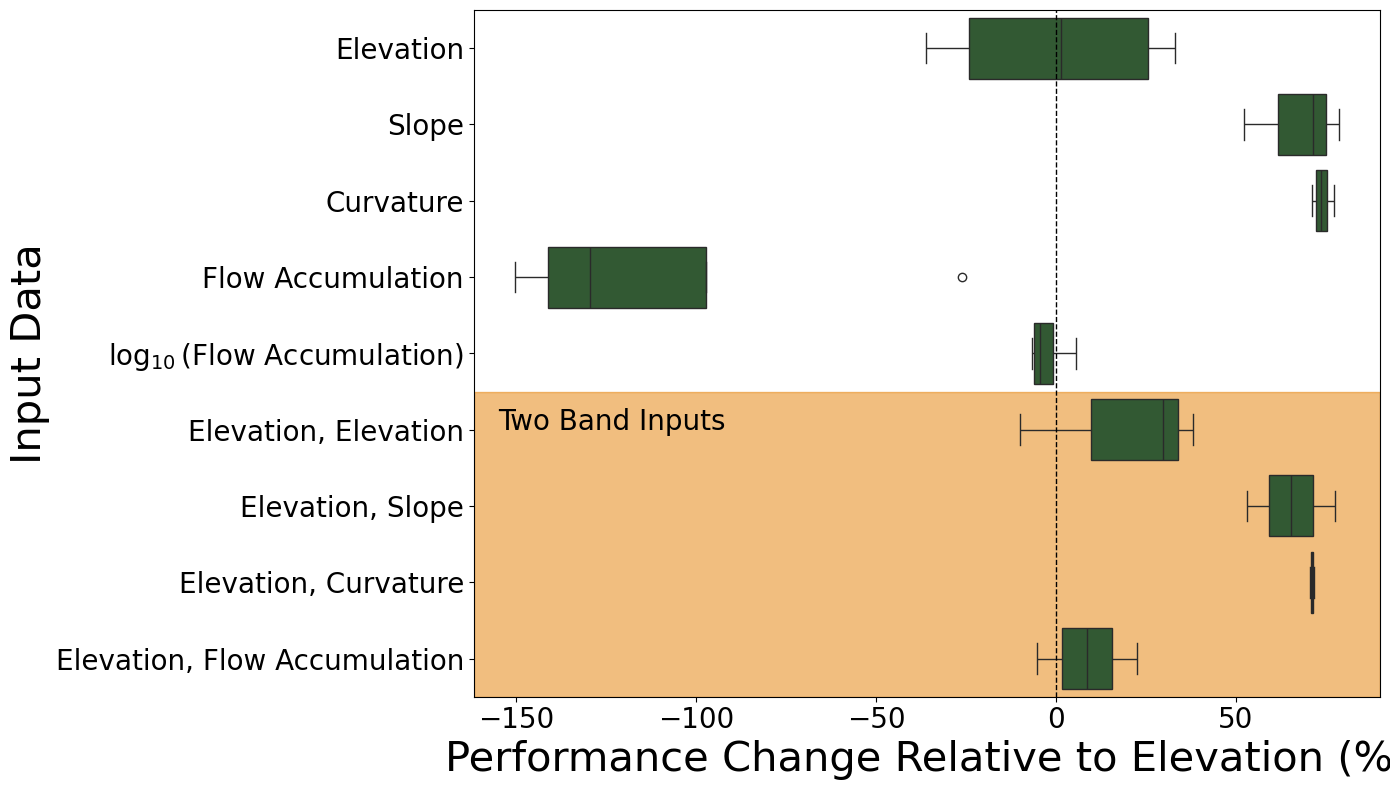

In [194]:
rmse_df = pd.read_csv("../../../analysis/overall_performance.csv")
rmse_df = rmse_df[rmse_df['value']=="D/K"]
one_part_df = rmse_df[rmse_df['parts']==1]
two_part_df = rmse_df[rmse_df['parts']==2]
fig, ax = plt.subplots(figsize=(14,8))
ax.axhspan(4.5,8.5, alpha=0.5, color='#E57F00')#, label='Two Band Inputs')
sns.boxplot(data=rmse_df, x="dem_baseline", y="labels", ax=ax, color="#2C5F2D",
            order=['Elevation', 'Slope', 'Curvature', 'Flow Accumulation', '$\\log_{10}(\\text{Flow Accumulation})$', 'Elevation, Elevation', 'Elevation, Slope', 'Elevation, Curvature', 'Elevation, Flow Accumulation'])
ax.axvline(0, color='black', linestyle='--', linewidth=1)
#ax.axhspan(4.5,8.5, alpha=1, color='#E57F00', label='Two Band Inputs')
ax.set_ylabel("Input Data")
ax.set_xlabel("Performance Change Relative to Elevation (%)")
ax.text(-155, 5, "Two Band Inputs", fontsize=20)
fig.tight_layout()
fig.savefig("dk_perf_change.svg")

In [60]:
from landlab_torch_tools import SineTopographyDataset
from matplotlib import pyplot as plt

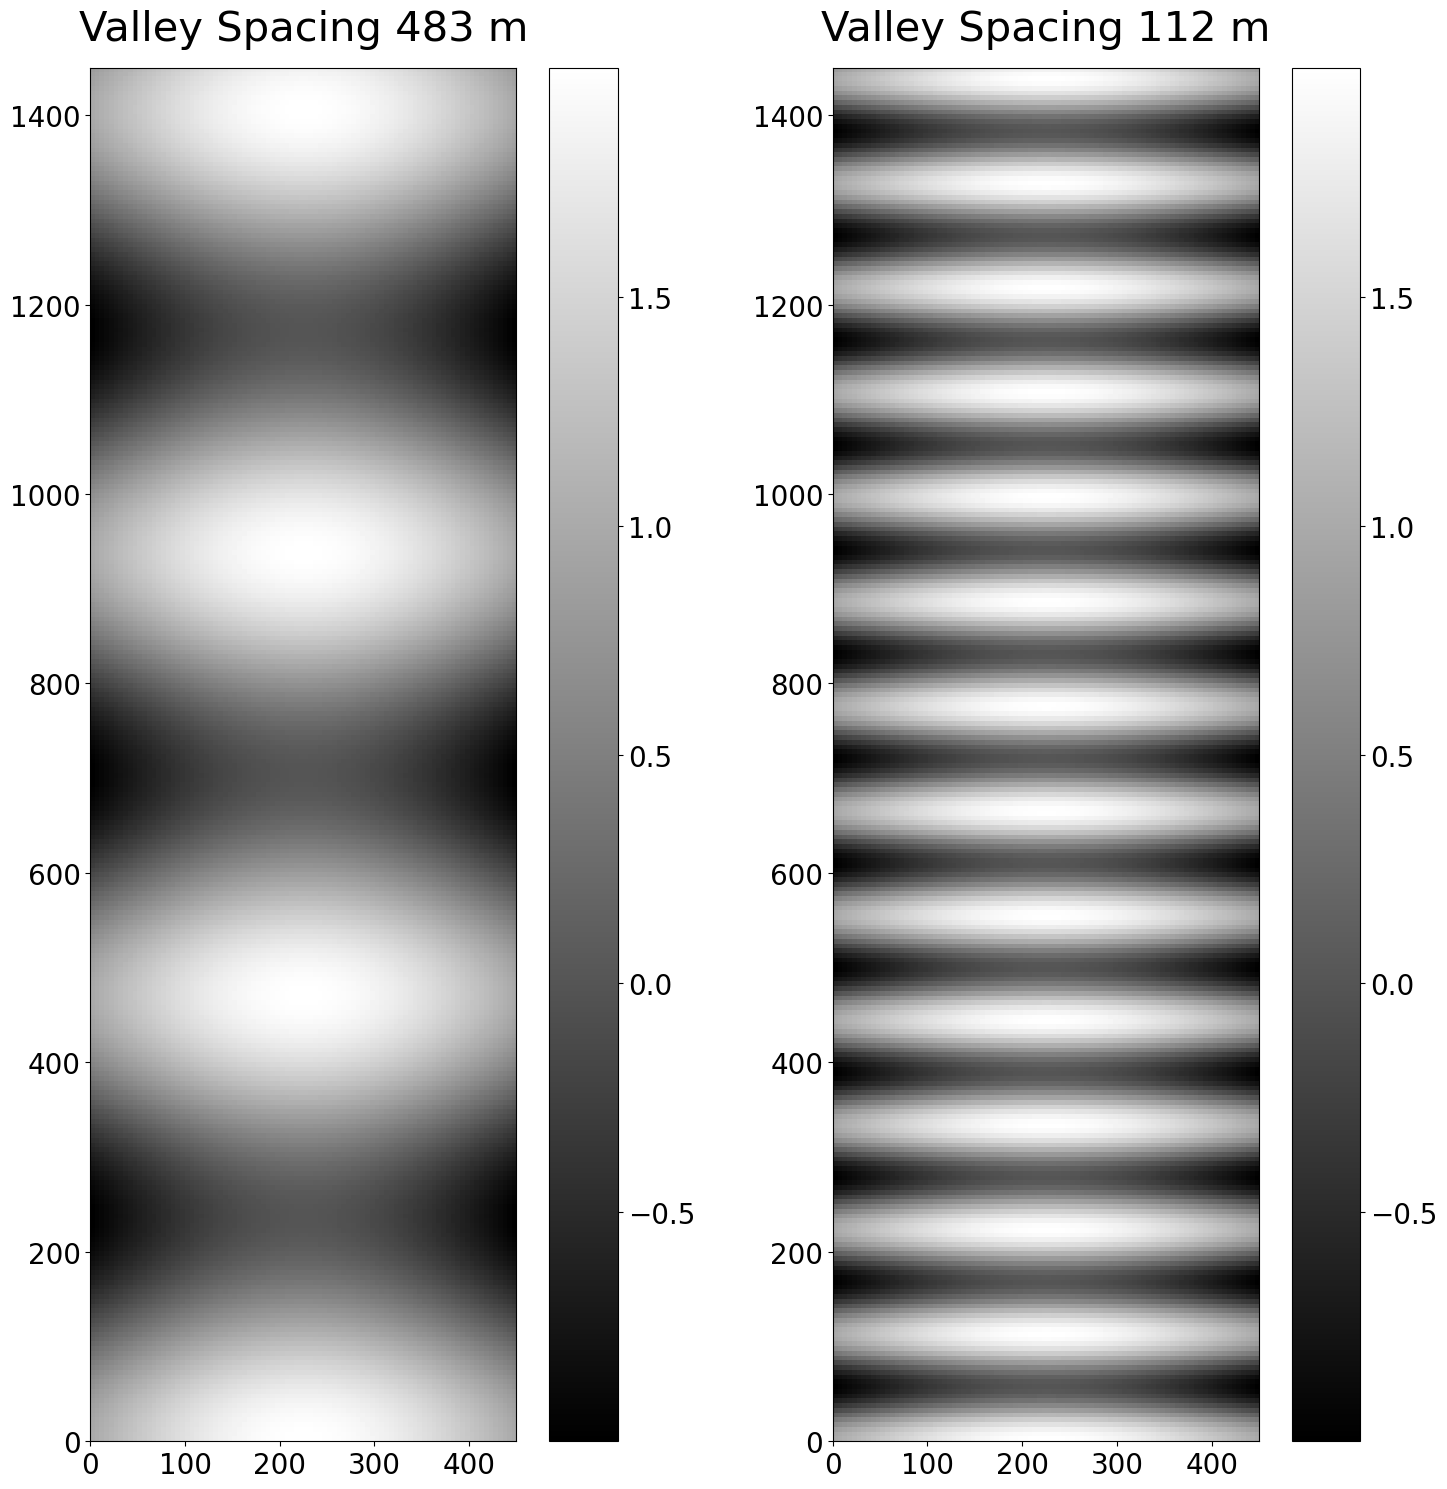

In [190]:
sineset = SineTopographyDataset(90, 290, 'y')
fig, axs = plt.subplots(1,2, figsize=(15,15))
v0 = axs[0].imshow(sineset[0][0].squeeze(), cmap='gray', extent=(0,90*5,0,290*5))
axs[0].set_title(f"Valley Spacing {(290*5)/sineset[0][1]:.0f} m",  pad=20)
v1 = axs[1].imshow(sineset[10][0].squeeze(), cmap='gray', extent=(0,90*5,0,290*5))
axs[1].set_title(f"Valley Spacing {(290*5)/sineset[10][1]:.0f} m",  pad=20)
fig.colorbar(v0, ax=axs[0])
fig.colorbar(v1, ax=axs[1])
fig.tight_layout()
fig.savefig("sinescapes_example.svg")

In [73]:
from ThreeLayerCNNRegressor import ThreeLayerCNNRegressor
import json
import torch
from torch.utils.data import DataLoader
import numpy as np

In [74]:
MODEL_STATS_PATH = "../../../model_stats.json"
DEM_WEIGHT_PATH = "../../../weights/dem_10_weights.pt"
with open(MODEL_STATS_PATH, 'r') as f:
    stats = json.load(f)
labels_mean = stats['labels']['labels_mean']
labels_std = stats['labels']['labels_std']

model = ThreeLayerCNNRegressor()
model.load_state_dict(torch.load(DEM_WEIGHT_PATH))
loader = DataLoader(sineset, 64, shuffle=False)
model.eval()
valleys = []
norm_labels = []
with torch.no_grad():
    for i, (data, valley) in enumerate(loader):
        data = data.float()
        valley = valley.float()
        norm_label = model(data)
        valleys += valley
        norm_labels += norm_label
labels = [l*labels_std + labels_mean for l in norm_labels]
valley_spacing = (290*5)/np.array(valleys)

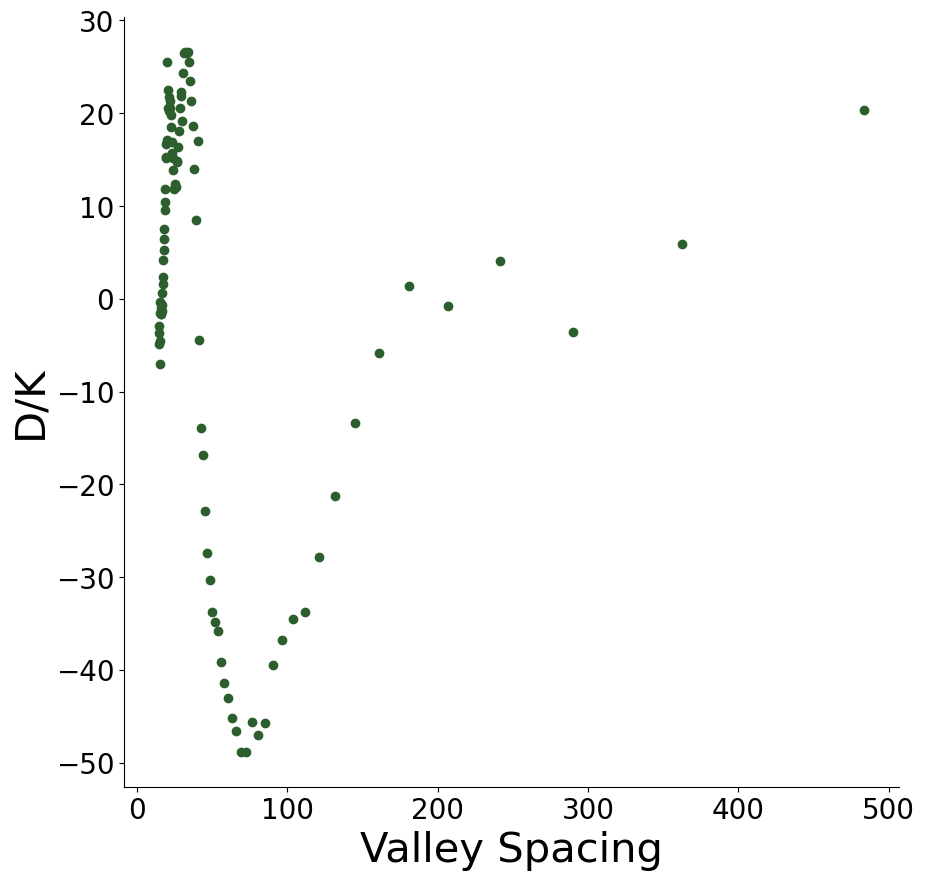

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(valley_spacing, labels, c="#2C5F2D")
ax.set_xlabel('Valley Spacing')
ax.set_ylabel('D/K')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig("sin_performance.svg")

In [82]:
import sqlite3
from landlab_torch_tools import AdaptiveThresholdDataset
from ThreeLayerCNNRegressor import ThreeLayerCNNRegressor
from pathlib import Path
import json
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import numpy as np

In [83]:
db_path = "../../../../peclet-prediction/model_runs.db"
acc_dataset_dir = Path("../../../../peclet-prediction/model_run_flowacc")
weight_path = "../../../weights/dem_10_weights.pt"
model_stat_path = "../../../model_stats.json"

In [84]:
connection = sqlite3.connect(db_path)
cursor = connection.cursor()
cursor.execute('SELECT model_run_id, "model_param.diffuser.D"/"model_param.streampower.k" FROM model_run_params')
Dks = cursor.fetchall()
Dks.sort(key = lambda x: x[1])
low_Dk_run = Dks[int(len(Dks)/10)][0]
low_Dk_array = torch.unsqueeze(torch.tensor(np.load(acc_dataset_dir / f"{low_Dk_run}.npy")[5:-5,5:-5]), 0)
threshold_dataset = AdaptiveThresholdDataset(
    input_array = low_Dk_array,
    num_thresholds = 1000,
    percentile_range=(1,99),
    return_threshold=True
)

In [143]:
MODEL_STATS_PATH = "../../../model_stats.json"
DEM_WEIGHT_PATH = "../../../weights/dem_10_weights.pt"
with open(MODEL_STATS_PATH, 'r') as f:
    stats = json.load(f)
labels_mean = stats['labels']['labels_mean']
labels_std = stats['labels']['labels_std']
loader = DataLoader(threshold_dataset, 64, shuffle=False)
model = ThreeLayerCNNRegressor()
model.load_state_dict(torch.load(DEM_WEIGHT_PATH))
model.eval()
drainage_densities = []
thresholds = []
norm_labels = []
arrays = []
with torch.no_grad():
    for data, threshold in loader:
        data = data.float()
        arrays += data
        drainage_density = (data.sum(axis=(1,2,3))*5)/(np.prod(data.shape)*5*5)
        norm_label = model(data)
        drainage_densities += drainage_density
        norm_labels += norm_label
        thresholds += threshold
labels = [l*labels_std+labels_mean for l in norm_labels]

In [88]:
from matplotlib.ticker import FormatStrFormatter

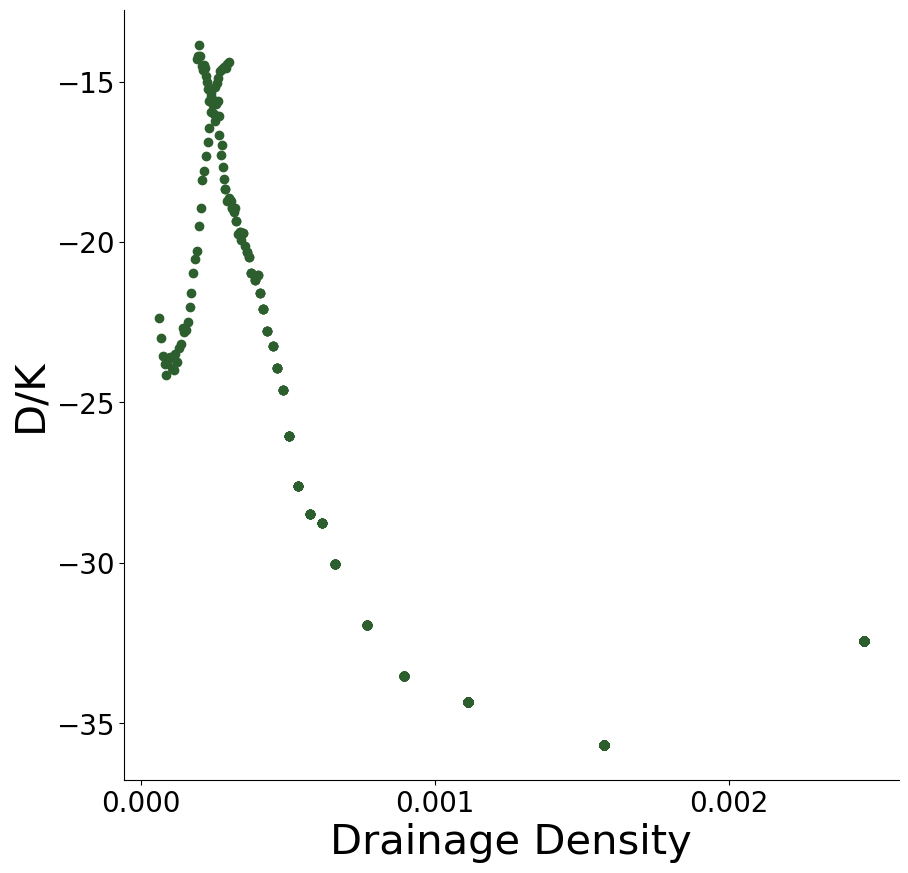

In [171]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(drainage_densities, labels, c="#2C5F2D")
ax.set_xlabel('Drainage Density')
ax.set_ylabel('D/K')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
fig.savefig("dd_performance.svg")

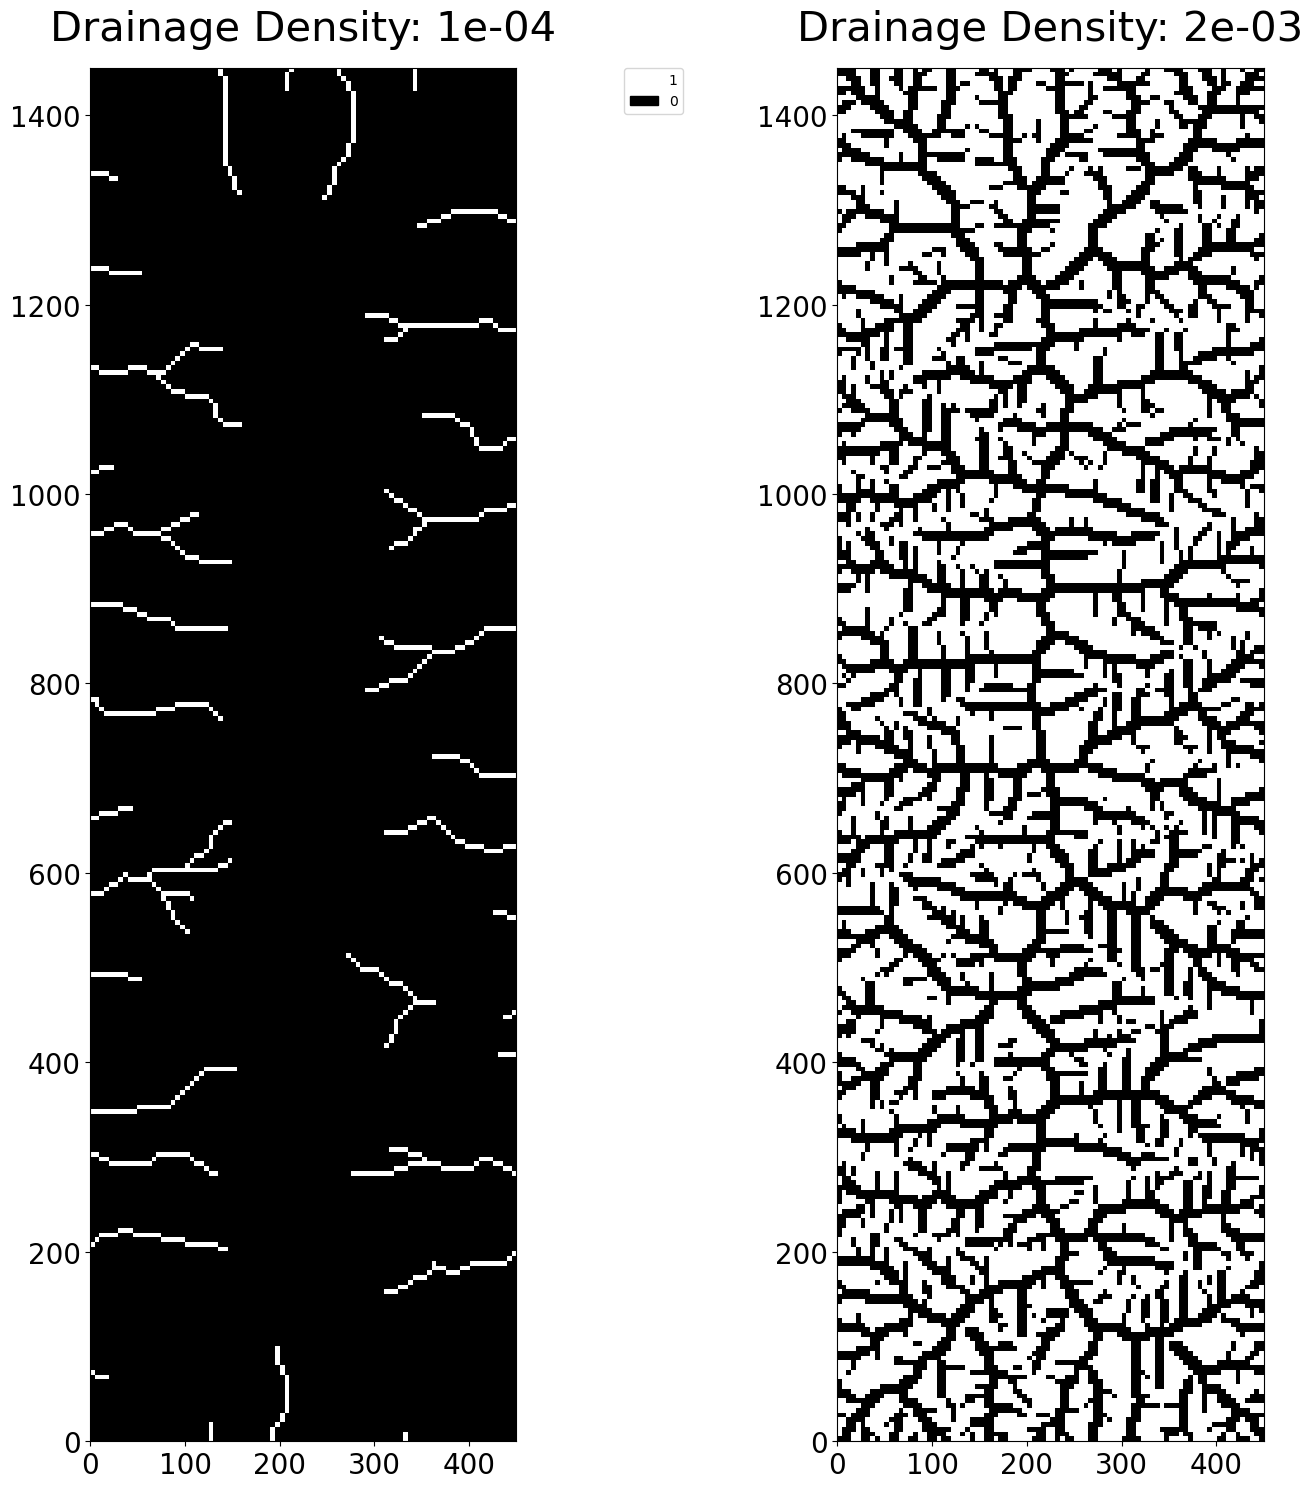

In [191]:
import matplotlib.patches as mpatches
fig, axs = plt.subplots(1,2, figsize=(15,15))
v0 = axs[1].imshow(arrays[0][0].squeeze(), cmap='gray', extent=(0,90*5,0,290*5))
axs[1].set_title(f"Drainage Density: {drainage_densities[0]:.0e}",  pad=20)
v1 = axs[0].imshow(arrays[-20][0].squeeze(), cmap='gray', extent=(0,90*5,0,290*5))
axs[0].set_title(f"Drainage Density: {drainage_densities[-20]:.0e}",  pad=20)
values = [1,0]
colors = [ v0.cmap(v0.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label="{l}".format(l=values[i]) ) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(-.5, 1), loc=2, borderaxespad=0. )
#fig.colorbar(v0, ax=axs[0])
#fig.colorbar(v1, ax=axs[1])
fig.tight_layout()
fig.savefig("dd_example.svg")

In [161]:
drainage_densities[0]

tensor(0.0020)